# Assignment 2 - ABC News

In this assignment we will use list comprehensions, plotting, advanced function design, and Counter/defaultdict to analyze the news headlines from the Australian Broadcasting Company from 2003-2019. You must use the Python approaches we learned this week.

None of the cells require significant lines of code. If you find yourself writing very long amounts of code at any point, you should take a step back and rethink your approach.

The file you are reading data from is `/data/CS703/abcnews-date-text.csv`. It is a comma separated file (CSV).

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import collections


## Read File 

The file has two columns separated by a comma:
1. date of publication of the format yyyymmdd
2. article title

Your code should read in this data into a list of lists named `full_data`. The date and title should both be stored as strings, and you should strip off the newline character from the end of the title. For instance, if your data looked like this:

```
20030219, dolphins can swim
20030219, february is cold
```

Then `full_data` would look like this:

```
[["20030219", "dolphins can swim"],
["20030219", "february is cold"]]
```
Write your code to read in the data into this format and save it into `full_data`.

In [6]:
with open("/data/CS703/abcnews-date-text.csv", "r") as f:
    stripped = [line.strip('\n') for line in f]
    full_data = [line.split(',') for line in stripped]
#print(full_data)


In [7]:
# Check that first item in list is stored correctly:
print(full_data[0])
# expected output: ['20030219', 'aba decides against community broadcasting licence']
# Check that last item in the list is stored correctly:
print(full_data[-1])
# expected output: ['20191231', 'yarraville shooting woman dead man critically injured']

['20030219', 'aba decides against community broadcasting licence']
['20191231', 'yarraville shooting woman dead man critically injured']


In [8]:
assert (len(full_data) == 1186018), "Incorrect number of items in list"
assert type(full_data) == list, "full_data is not a list"
assert type(full_data[0]) == list, "items in full_data are not lists"
assert len(list(x for x in full_data if type(x) == list)), "full_data is not a list of lists"
assert (full_data[-1] == ['20191231', 'yarraville shooting woman dead man critically injured\n'] or
       full_data[-1] == ['20191231', 'yarraville shooting woman dead man critically injured']), "last item incorrect"

## Pulling Out Specific Years 

Create a function that returns a list that only contains the headlines from a specified year. The year is specified as a function parameter. *The function must use a list comprehension.* This list should not contain the dates. You should only need 1 line of code to create the list.

If you are feeling stuck, try to reason through how to solve the problem with a for loop. Then after you have a loop, figure out how to convert it to a list comprehension.

In [ ]:
# use a list comprehension to create a list of only the headlines from the year specified as a parameter
def headlines_by_year(data,year):
    year_data = [line[1] for line in data if year in line[0]]
    return year_data



Now, call the `headlines_by_year` function using the year 2019, and store the results in a list named `y2019_headlines`.
There should be only 1 line of code in the below cell, and no list comprehensions.

In [ ]:
y2019_headlines = headlines_by_year(full_data, "2019")



In [ ]:
#autograder tests
print(y2019_headlines[0]) # expected: after expo ministers approved an artificial island
print(y2019_headlines[-1]) # expected: yarraville shooting woman dead man critically injured

In [ ]:
assert (len(y2019_headlines)==34060), "list is not the correct length " + str(len(y2019_headlines))
assert (type(y2019_headlines) == list), "it is not a list"
assert (len(list(x for x in y2019_headlines if type(x) != str))==0), "it is not a list of strings"

## Making Lists of Words 

Much of what we might want to determine about these headlines are about the words contained in them. To make that analysis easier, we need to break up each headline into words. Our goal is to create a new list of lists from our yearly headline list.

For example, if the result of your headlines_by_year function is a list that looks like this:
```
["dolphins can swim","february is cold"]
```
Our new list will look like this:
```
[["dolphins","can","swim"],
 ["february","is","cold"]]
```

Write the code below to create a new list called `y2019_headline_lists` that is this type of list of lists. Use a list comprehension.

In [ ]:
y2019_headline_lists = [i.split() for i in y2019_headlines]


In [ ]:
# to see what was created
print(y2019_headline_lists[0])
print(y2019_headline_lists[1])
print(y2019_headline_lists[-1])

In [ ]:
assert (len(y2019_headline_lists) == 34060), "Incorrect number of items in list"
assert (len(y2019_headline_lists[0])==7), "Incorrect number of items in first sublist: " + str(len(y2019_headline_words[0]))
assert(y2019_headline_lists[4]==['bangladesh',
 'ruling',
 'coalition',
 'declared',
 'winner',
 'of',
 'disputed',
 'vote']), "5th element has incorrect values"
assert type(y2019_headline_lists) == list, "it is not a list"
assert len(list(x for x in y2019_headline_lists if type(x) == list)), "it is not a list of lists"

## Combining the two approaches

Now that you've figure out how to create a list comprehension that breaks apart the headlines for a specific year, and another list comprehension that makes a list of words from those headlines:

1. combine those two approaches into a single list comprehension in the function `headline_lists_by_year` so that we can accomplish the same goal in a single step.
2. call this function to create `y2015_headline_lists` for headlines from 2015.

To combine the two approaches does not mean to copy/paste the new steps into this function. Instead, look at your two list comprehensions that you created. Can you figure out how to make a single list comprehension that does all of these steps?

In [9]:
# Creates a list of headline word lists for the provided year
# data is the list of lists read from the file
# year is the year whose data we will put into our new list
# Note this is just combining the two steps you already figured out how to do above,
# so that you have 1 function that does it all
def headline_lists_by_year(data,year):    
    year_data = [line[1].split() for line in data if year in line[0]]
    return year_data


In [10]:
y2015_headline_lists = headline_lists_by_year(full_data, "2015")


In [11]:
# Let's see what our new list looks like
print(y2015_headline_lists[0])
print(y2015_headline_lists[-1])

['1000s', 'celebrate', 'nye', 'in', 'adelaide']
['your', 'favourite', 'movies', 'of', '2015']


In [12]:
assert (len(y2015_headline_lists) == 77290), "Incorrect number of items in list"
assert (len(y2015_headline_lists[0])==5), "Incorrect number of items in first sublist"
assert type(y2015_headline_lists) == list, "y2015_headline_lists is not a list"
assert len(list(x for x in y2015_headline_lists if type(x) == list)), "y2015_headline_lists is not a list of lists"
assert (y2015_headline_lists[-1] == ['your', 'favourite', 'movies', 'of', '2015']), "last item is incorrect"

# Counting Specific Words

Let's analyze how many headlines from a specific year use specific words by creating a generic function that can be used to count any number of words, as specified by the code that calls it. This function should be called `wordcount` and have two parameters: the list of headline words, and `*args`. You will need to use the `*args` parameter to allow any number of arguments to your function.

In this function you should:

* use defaultdict
* return a dictionary with the counts of how many headlines contain each of the words sent as an argument

For instance, if I call your function giving it three words, then I should receive a dictionary that only contains the counts of how many headlines have each of those words. This is NOT the same as how many times those words appear across all headlines, as a headline may use a word more than one time.

In [175]:
''' 
  create a function named "wordcount" that will create a count of headlines with specified words 
  rlist: the list of headlines in the list of lists format (e.g. [["headline", "words"], ["more", "headline"]])
  *args: words to search for
  return: a dictionary of each specified word and its count
'''
def wordcount(rlist,*args): 
    headlinecount = collections.defaultdict(int)
    for line in rlist:
        for keyword in args:
            for word in line:
                if keyword == word:               
                    headlinecount[word] += 1
                    break            
    return headlinecount   

#how do i make this more efficient??

Now, call this function to count the number of headlines containing the words "the", "and", and "cat" in the `y2015_headline_lists` list, and output the result in the following format:
```
word : count
```

If your code is working correctly, you should see the following output:
```
the : 4793
and : 2848
cat : 59
```

In [178]:
mycount = wordcount(y2015_headline_lists, "the", "and", "cat")
print(mycount)  


defaultdict(<class 'int'>, {'and': 2848, 'the': 4793, 'cat': 59})


Now that you have a word counting function, you could call it for any headline list that you create.

In [ ]:
# you can ignore this cell, it contains tests to run when grading

## Graphing Word Counts Comparing Years

How much do the counts of specific words vary between two years of data? In this section, you will find the counts of five specific words in two different years worth of data, and then plot those counts on a bar graph.

### Step 1

The data is interesting as a counter, but really a graph is a much better visual. You may find the example at https://kite.com/python/answers/how-to-plot-a-bar-chart-using-a-dictionary-in-matplotlib-in-python helpful for how to graph a dictionary.

Create a function that will show a bar graph of the counts of words for a particular year. Your function should:

1. take a dictionary (such as a counter) as its first position parameter
2. take two keyword parameters: x-axis label, and y-axis label. Both should have default values of an empty string.

Be sure to add any import lines needed to plot and also to ensure that the plot appears inline.

In [226]:
def dictGraph(file, xlable, ylabel):  
    keys = file.keys()
    values = file.values()
    plt.bar(keys,values)
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    return
#raise NotImplementedError()

### Step 2

Next, we need to create the data that we'll graph:
1. Call your previously created function to create a list of headline words of the same style as y2015_headline_lists for a year other than 2015 or 2019.
2. Do the same as step 1, but for another not yet used year.

You should need two total lines of code.

In [239]:
year2008 = headline_lists_by_year(full_data, "2008")
year2006 = headline_lists_by_year(full_data, "2006")



### Step 3
Next, you should choose five words to count frequency of in headlines. Then call your `wordcount` function to count the number of times each of those five words exist in your two years of headlines.

HINT: you should not need to modify your previously written wordcount function, only call it.

NOTE: You could complete this step by creating a list of your five words and correctly sending it as an argument to wordcount so that you don't have to type out the five words two times. You should still not need to make any changes to the wordcount function. Although this is not required, it's a good chance to practice something we learned this week, and help you earn an "E". How can we send all values from a list as positional arguments?

In [230]:
countOf2006 = wordcount(year2006, "fired", "major", "shame", "actor", "because")
countOf2008 = wordcount(year2008, "fired", "major", "shame", "actor", "because")


### Step 4 

Now it's time to graph. Call the graphwords function you already created to graph each of your sets of word counts for the first year you chose. Set the x and y axis labels via arguments. You should need 1 line of code.

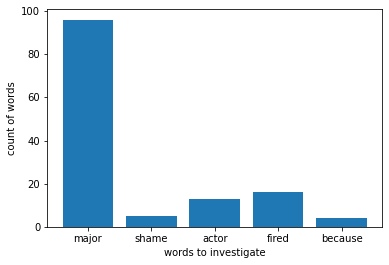

In [231]:
# graph the first year that you chose
dictGraph(countOf2006, "words to investigate", "count of words")


Now do the same for your second year.

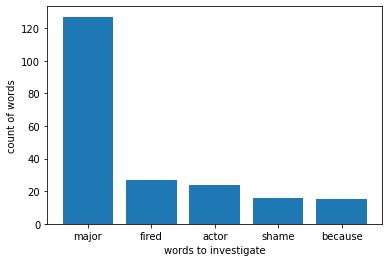

In [233]:
# graph the second year that you chose
dictGraph(countOf2008, "words to investigate", "count of words")


### Interpretation

How similar or different are your graphs for the words you chose?

Both graphs indicate that the word "major" was used quite often. Through the years, the number of times the words are used have little variation, but it may be worth looking into trends of certain words/phrases.

## Most Common Words in Headlines

What are the most common words in a particular year's headlines?

Using collections.Counter for one of the two years you just graphed:
1. Count the number of times every word that exists in that year's headlines appears in the headlines that year
2. Print a list of the 15 most common words 

Note that you should be using Counter's built-in functions to accomplish these tasks with very few lines of code. You may find hints in Chapter 2 of your textbook, as well as looking at its documentation at https://docs.python.org/3/library/collections.html#collections.Counter.

In [267]:
count_len = collections.Counter()
for line in year2006:
    for word in line:
        count_len[word] += 1       
print(count_len.most_common(15))



[('to', 15229), ('for', 8231), ('in', 7487), ('of', 4353), ('on', 4134), ('over', 3403), ('police', 2458), ('govt', 2272), ('new', 1726), ('after', 1599), ('with', 1451), ('man', 1414), ('at', 1408), ('up', 1364), ('council', 1314)]


## New Ordering 

Use the sorted function to re-order the y2019_headline_lists list such that the lists are ordered based on how many words are in the headline. Save this new list into the variable `sorted_list`.

In [293]:
y2019_headline_lists = headline_lists_by_year(full_data, "2019")
sorted_list = sorted(y2019_headline_lists, key = len)
print(sorted_list)


[['metamorphs'], ['poland'], ['banks'], ['madelinelewis'], ['chums'], ['homeschool'], ['issinfrontofmoon'], ['censured'], ['interference'], ['headline'], ['repatriation'], ['voiceless'], ['about'], ['heartbeat'], ['timeline'], ['motherland'], ['rebellion'], ['fallout'], ['antonandespoir'], ['peloton'], ['riley'], ['insectageddon'], ['spring'], ['cattle'], ['crps'], ['cyclone', 'penny'], ['fish', 'flip'], ['frock', 'club'], ['india', 'elephants'], ['childcare', 'qualifications'], ['don', 'dale'], ['hannah', 'cabinet'], ['prisco', 'madagascar'], ['vanilla', 'slice'], ['secret', 'sardinia'], ['snowy', 'hydro'], ['racing', 'victoria'], ['koala', 'video'], ['talking', 'pictures'], ['spence', '2'], ['ben', 'davies'], ['hoofless', 'piglet'], ['bushfires', 'explained'], ['sach', 'bushfoods'], ['talking', 'pictures'], ['running', 'amok'], ['akuna', 'springs'], ['lending', 'slump'], ['tabulam', 'fire'], ['border', 'battlelines'], ['love', 'shack'], ['talking', 'pictures'], ['paladin', 'group'], 

In [294]:
# View start and end of list
print(sorted_list[0])
print(sorted_list[-1])

['metamorphs']
['big', 'ben', 'to', 'toll', 'for', 'first', 'time', 'since', '2017', 'to', 'ring', 'in', 'uk', 'new', 'year']


In [295]:
assert(sorted_list[0] == ['metamorphs']), "not correctly sorted"
assert(len(sorted_list) == 34060), "list is no longer the correct length"

# Reflection

We've made some initial analyses of the words used in headlines by ABC News from 2003-2019. Using markdown, briefly interpret the results of the above analysis, and list two more questions that could be answered using this data.

We have learned that the most common words in headlines are prepositions and words related government("police" and "council"). Using this dataset, we can find trends in topics and word usage. For example, when did the word "police" become the most used, or has the use of "due to" become less popular over the years?

# Extra Practice

Write the code to answer one of your additional questions on this data. This part does not affect your grade in any way, and you do not need to do it. But if you want extra practice with Python, this is a built-in opportunity.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Ignore the below cell, which will be used to save your grade to make it quick to see in feedback:
* 3: E
* 2: M
* 1: R
* 0: N

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()